## Retrieve the stddev from the figures


In [33]:
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def load_figure(filename):
    fig = pkl.load(open(filename, 'rb'))
    return fig



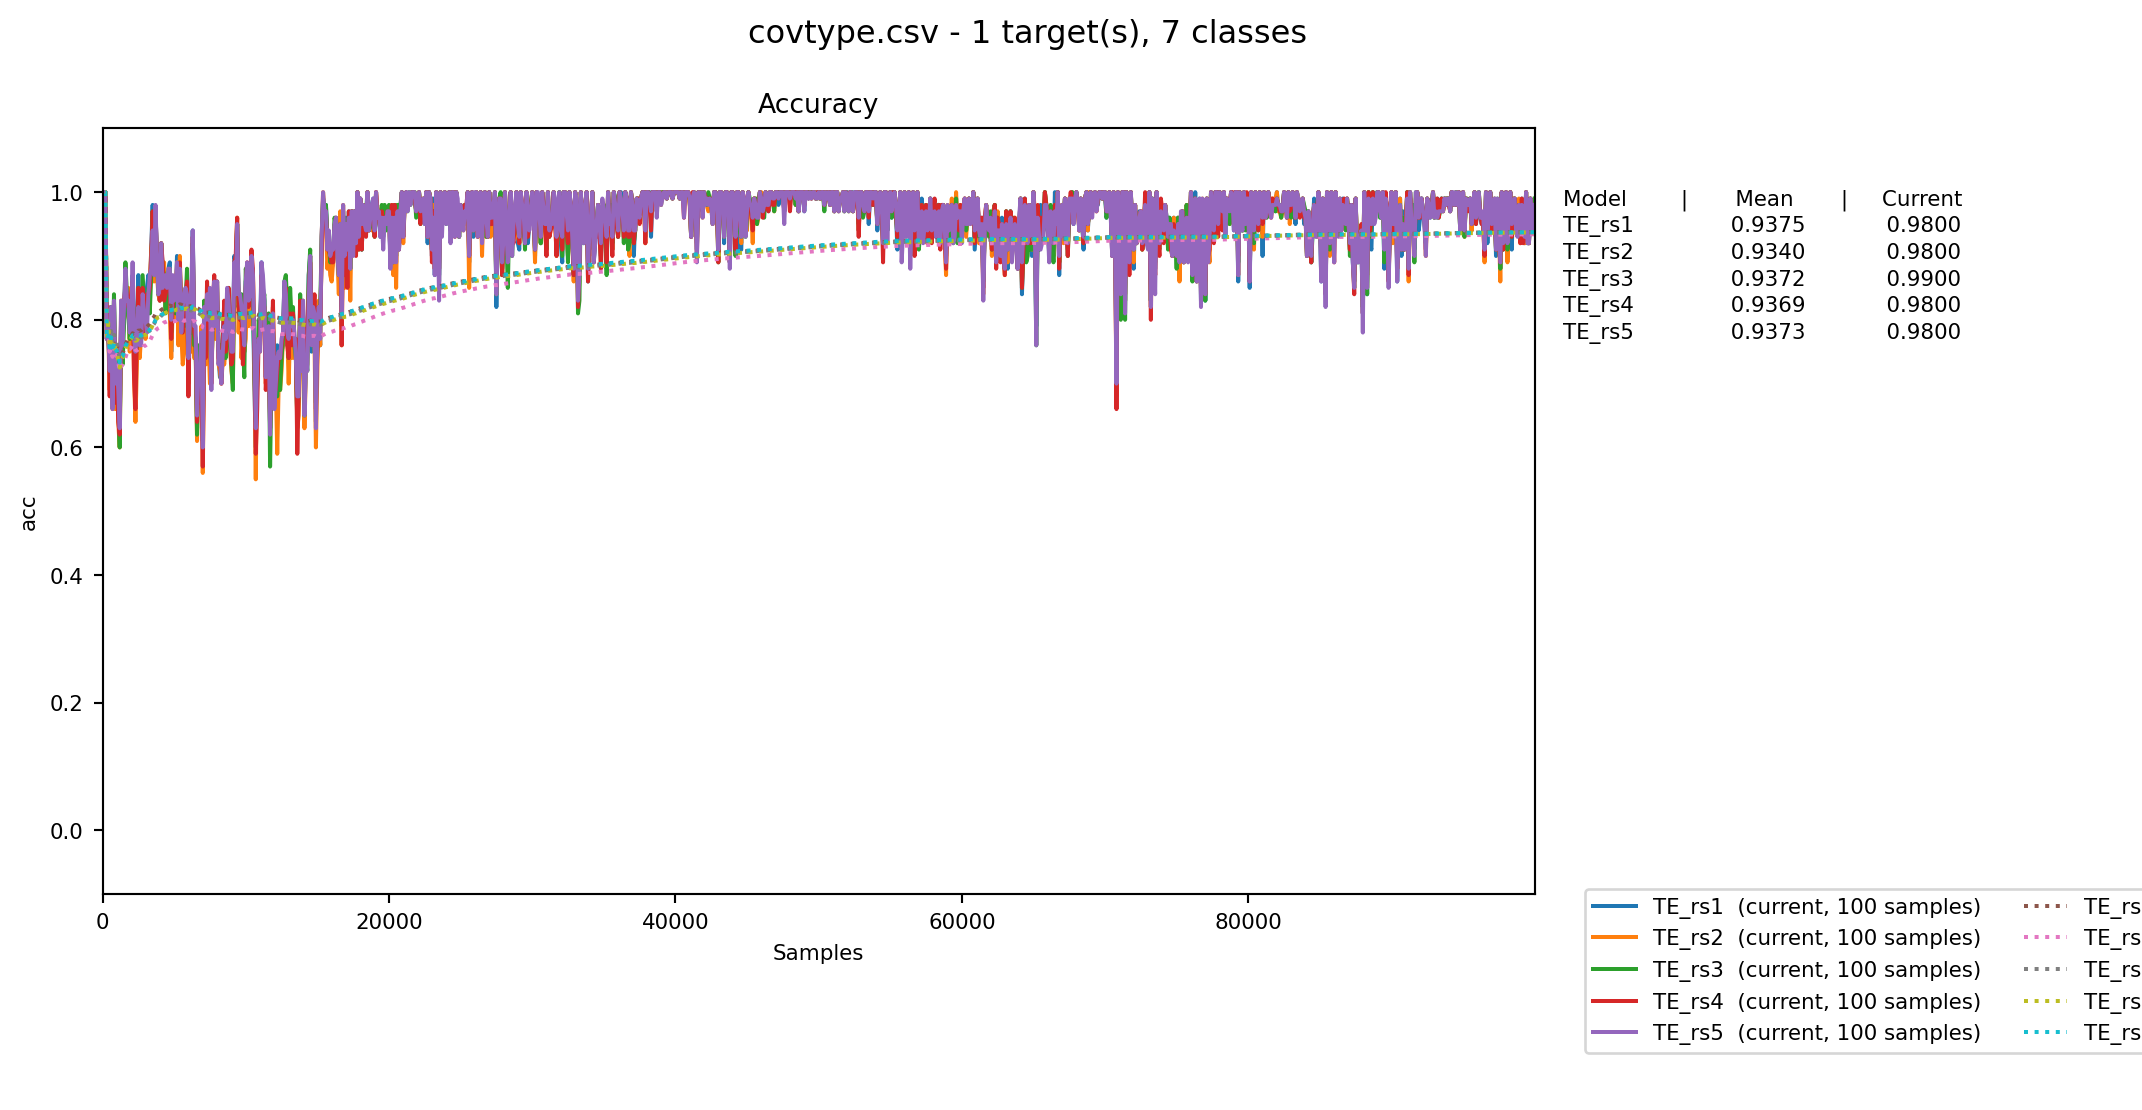

In [36]:
fig = load_figure('results/outputs.experiment1-bs1/exp1-2-covtype.png.pickle')

In [37]:
lines = fig.lines

In [38]:
[f'{i}: {l.get_label()}' for i, l in enumerate(lines)]


['0: TE_rs1  (current, 100 samples)',
 '1: TE_rs2  (current, 100 samples)',
 '2: TE_rs3  (current, 100 samples)',
 '3: TE_rs4  (current, 100 samples)',
 '4: TE_rs5  (current, 100 samples)',
 '5: TE_rs1 (mean)',
 '6: TE_rs2 (mean)',
 '7: TE_rs3 (mean)',
 '8: TE_rs4 (mean)',
 '9: TE_rs5 (mean)']

In [39]:
data = {l.get_label(): l.get_ydata() for l in lines}

In [42]:
std_deviations = {l.get_label().split()[0]: np.std(l.get_ydata()) for l in lines[:5]}


In [43]:
std_deviations

{'TE_rs1': 0.07455417090948031,
 'TE_rs2': 0.08232158343958162,
 'TE_rs3': 0.07609731664125878,
 'TE_rs4': 0.07691007671300296,
 'TE_rs5': 0.07471612342727639}

In [46]:
means = {l.get_label().split()[0]: np.average(l.get_ydata()) for l in lines[:5]}


In [52]:
print('\n'.join([f'{i}: {means[i]:.4f}' for i in means]))

TE_rs1: 0.9377
TE_rs2: 0.9341
TE_rs3: 0.9373
TE_rs4: 0.9370
TE_rs5: 0.9375


\begin{tabular}{llllll}
\toprule
           0 &                    1 &                    2 &                    3 &                    4 &                    5 \\
\midrule
     Dataset &               TE\_rs1 &               TE\_rs2 &               TE\_rs3 &               TE\_rs4 &               TE\_rs5 \\
     covtype &  0.938($\pm$0.075) &  0.934($\pm$0.082) &  0.937($\pm$0.076) &  0.937($\pm$0.077) &  0.937($\pm$0.075) \\
 electricity &  0.834($\pm$0.098) &  0.821($\pm$0.097) &  0.836($\pm$0.096) &  0.833($\pm$0.096) &  0.835($\pm$0.097) \\
 RTG\_2abrupt &  0.766($\pm$0.185) &  0.712($\pm$0.211) &  0.771($\pm$0.188) &  0.726($\pm$0.206) &  0.767($\pm$0.185) \\
  SEA\_abrupt &  0.877($\pm$0.051) &  0.873($\pm$0.048) &  0.879($\pm$0.048) &  0.877($\pm$0.049) &  0.877($\pm$0.050) \\
 SEA\_gradual &  0.876($\pm$0.048) &  0.872($\pm$0.046) &  0.876($\pm$0.047) &  0.875($\pm$0.047) &  0.877($\pm$0.047) \\
\bottomrule
\end{tabular}



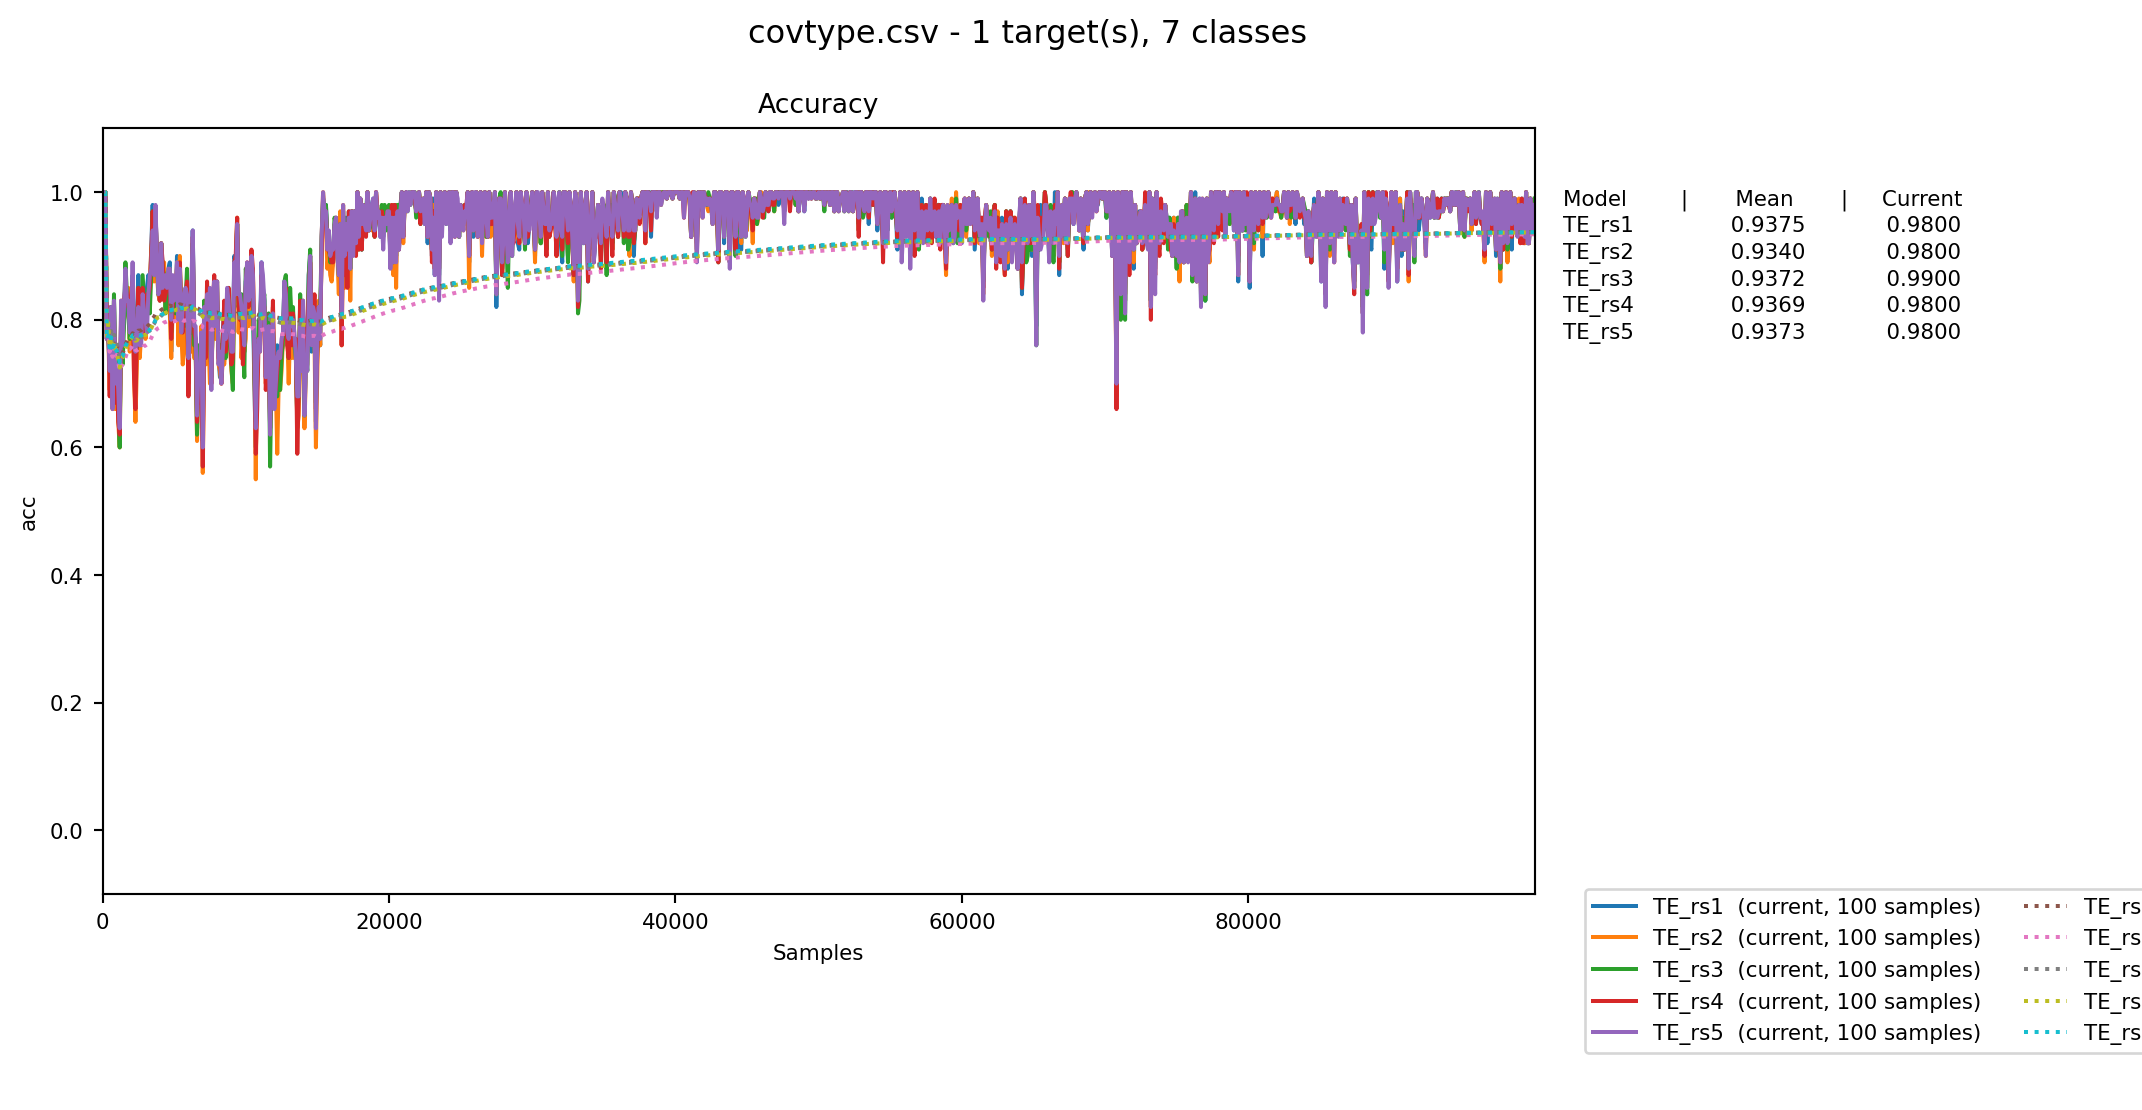

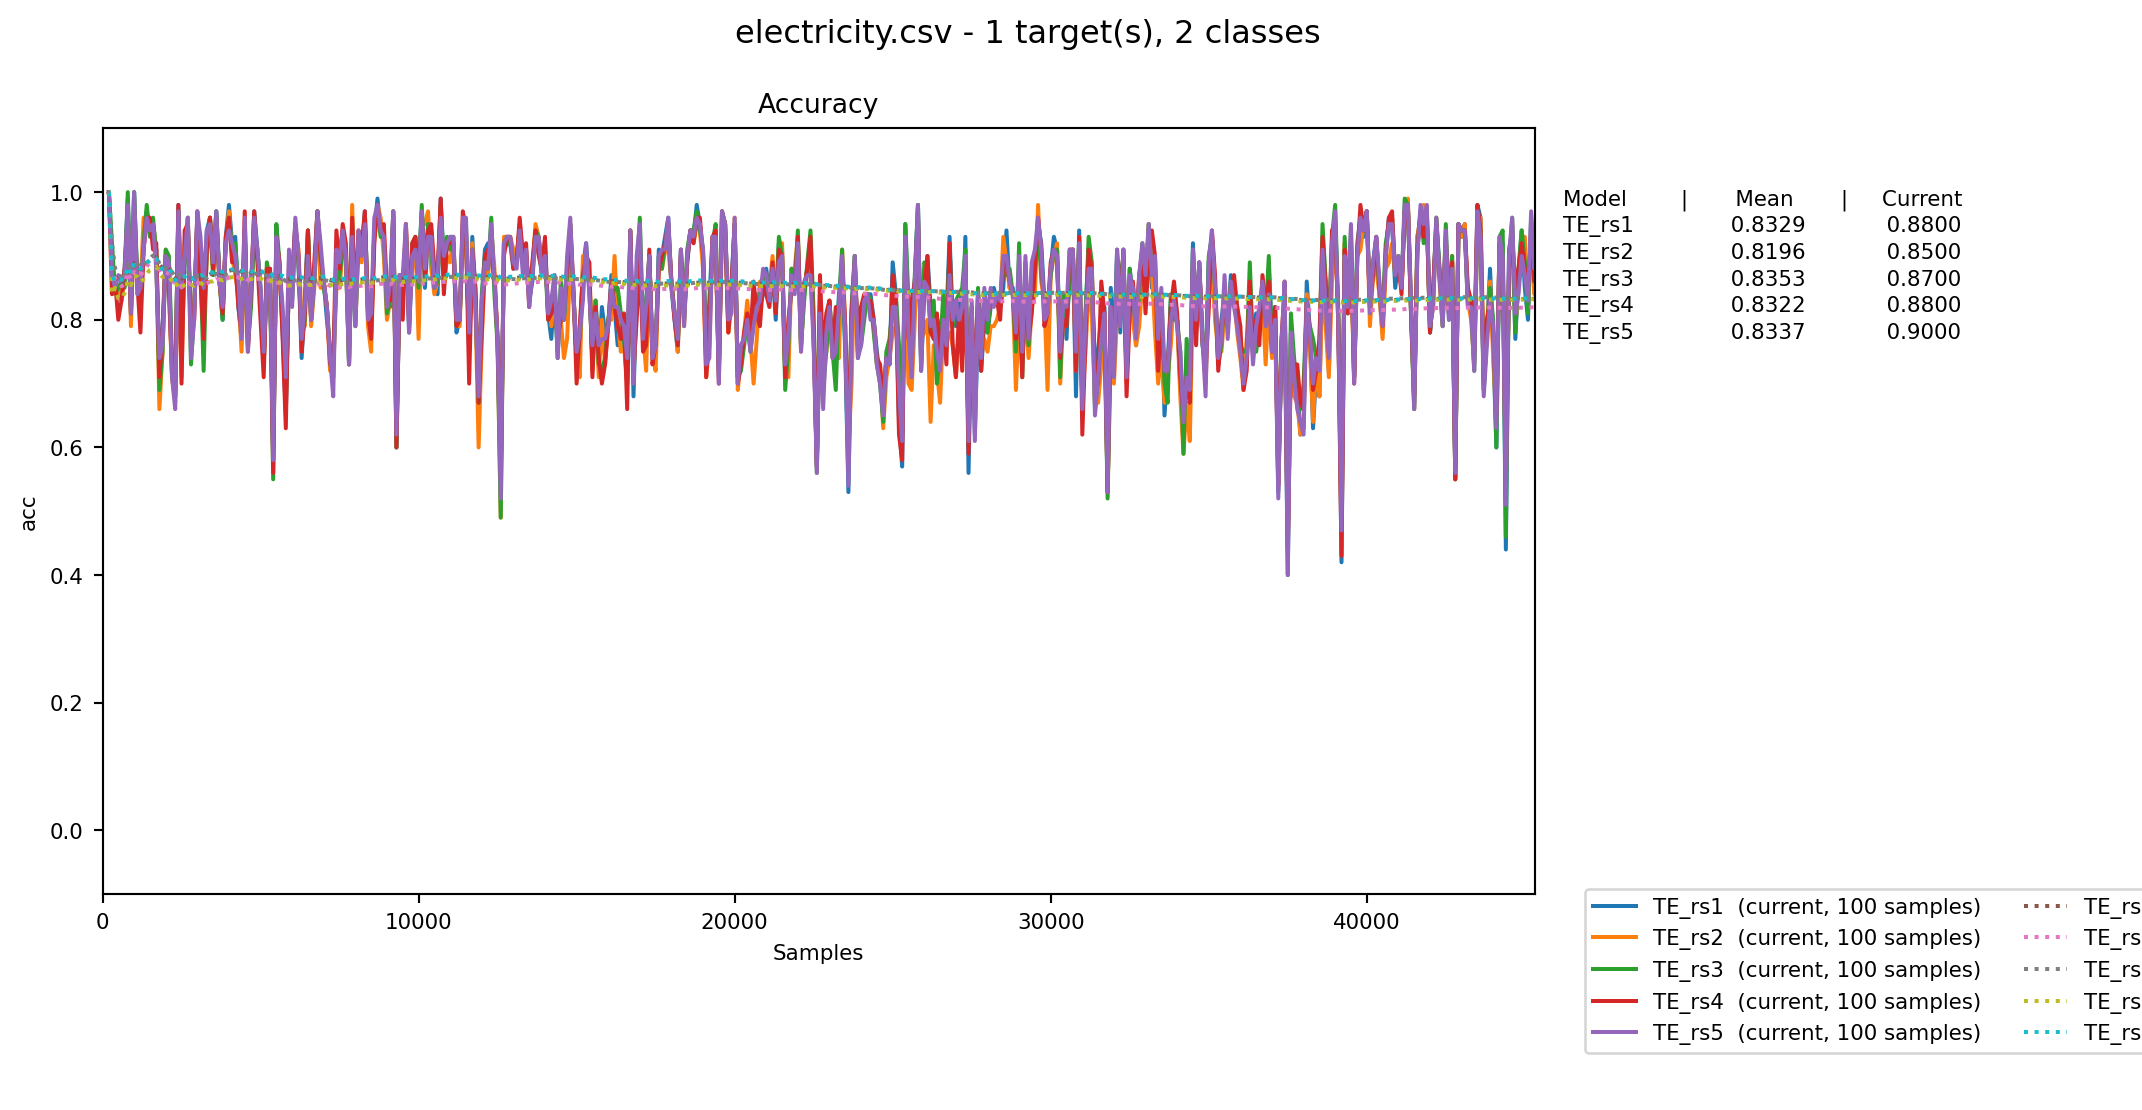

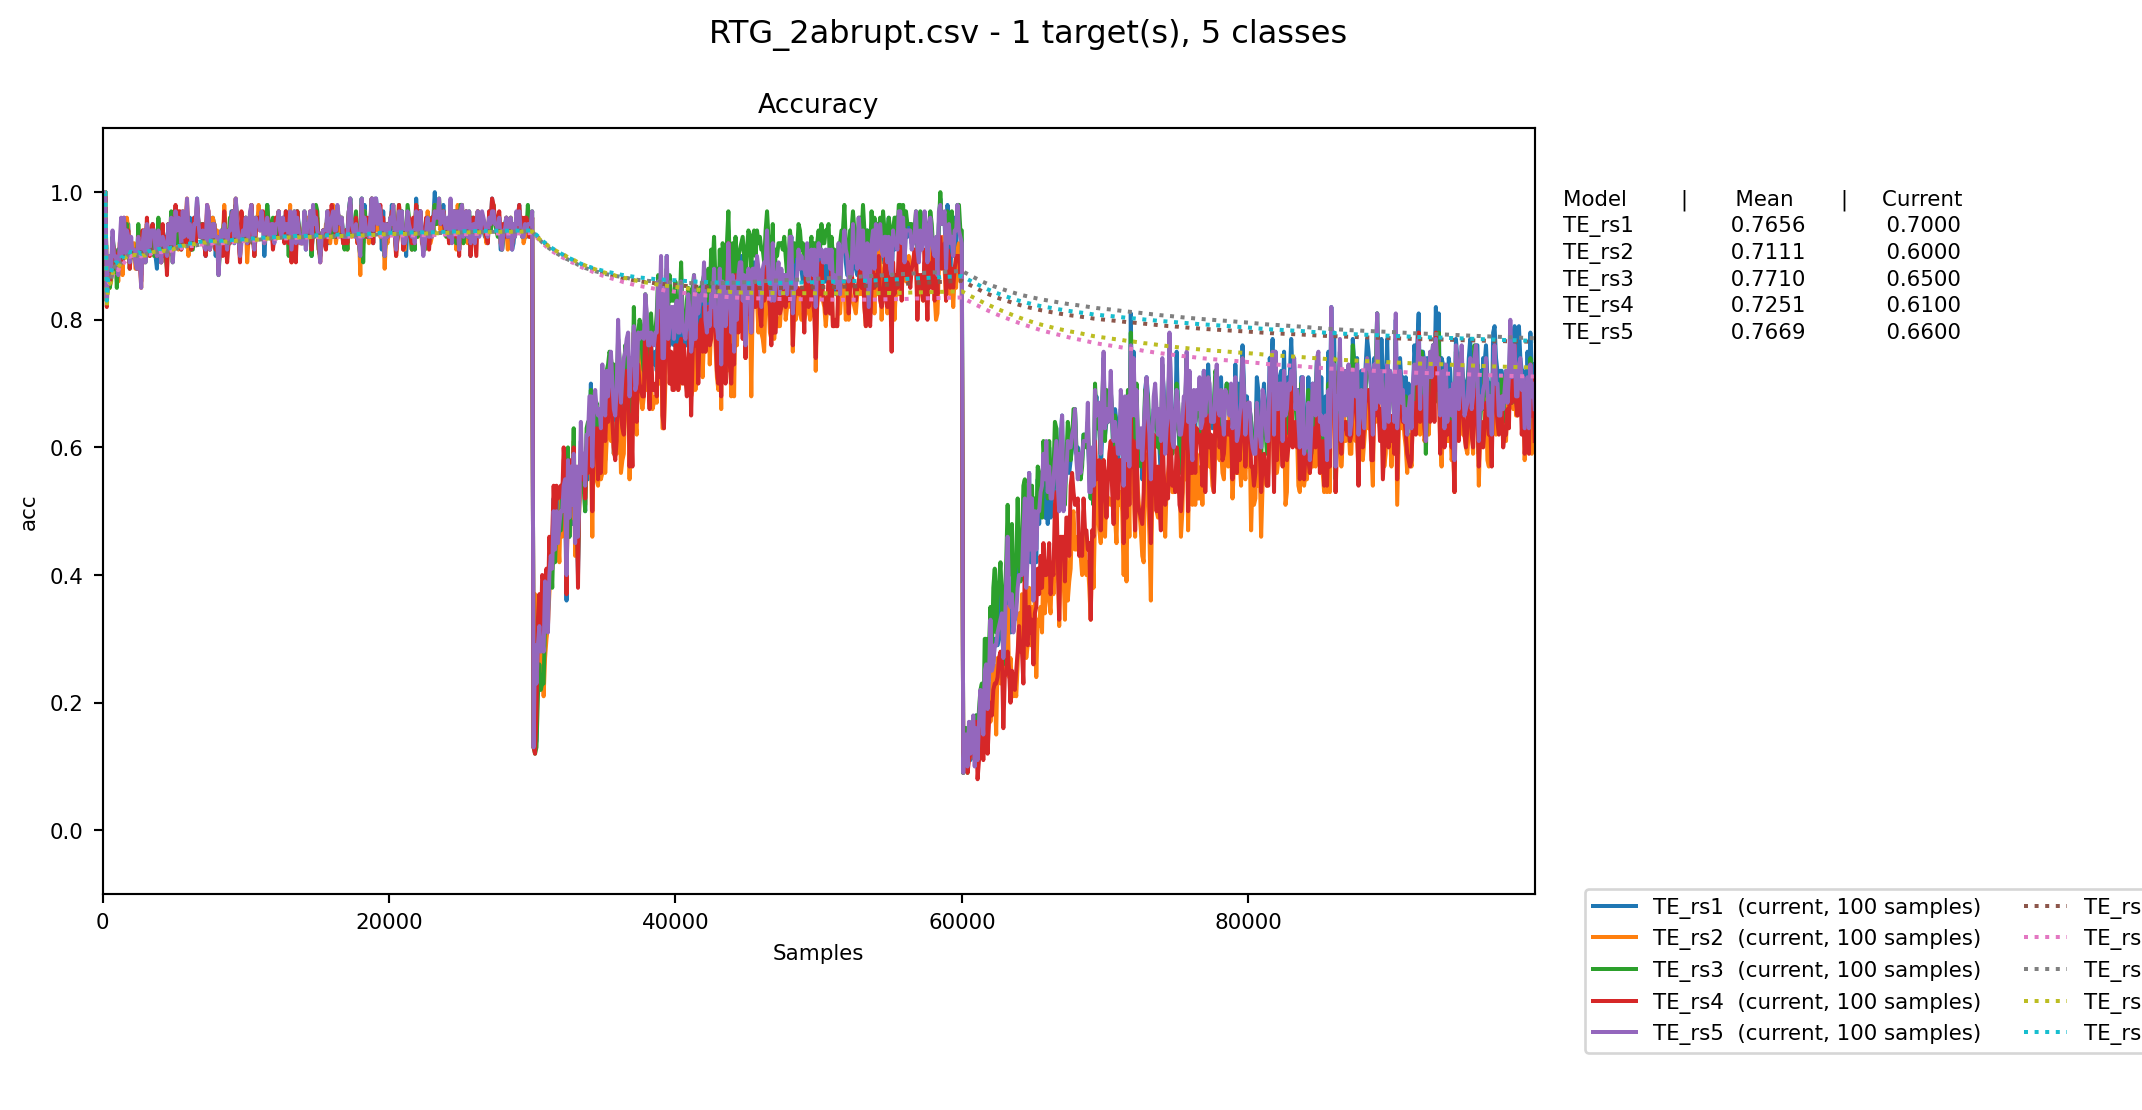

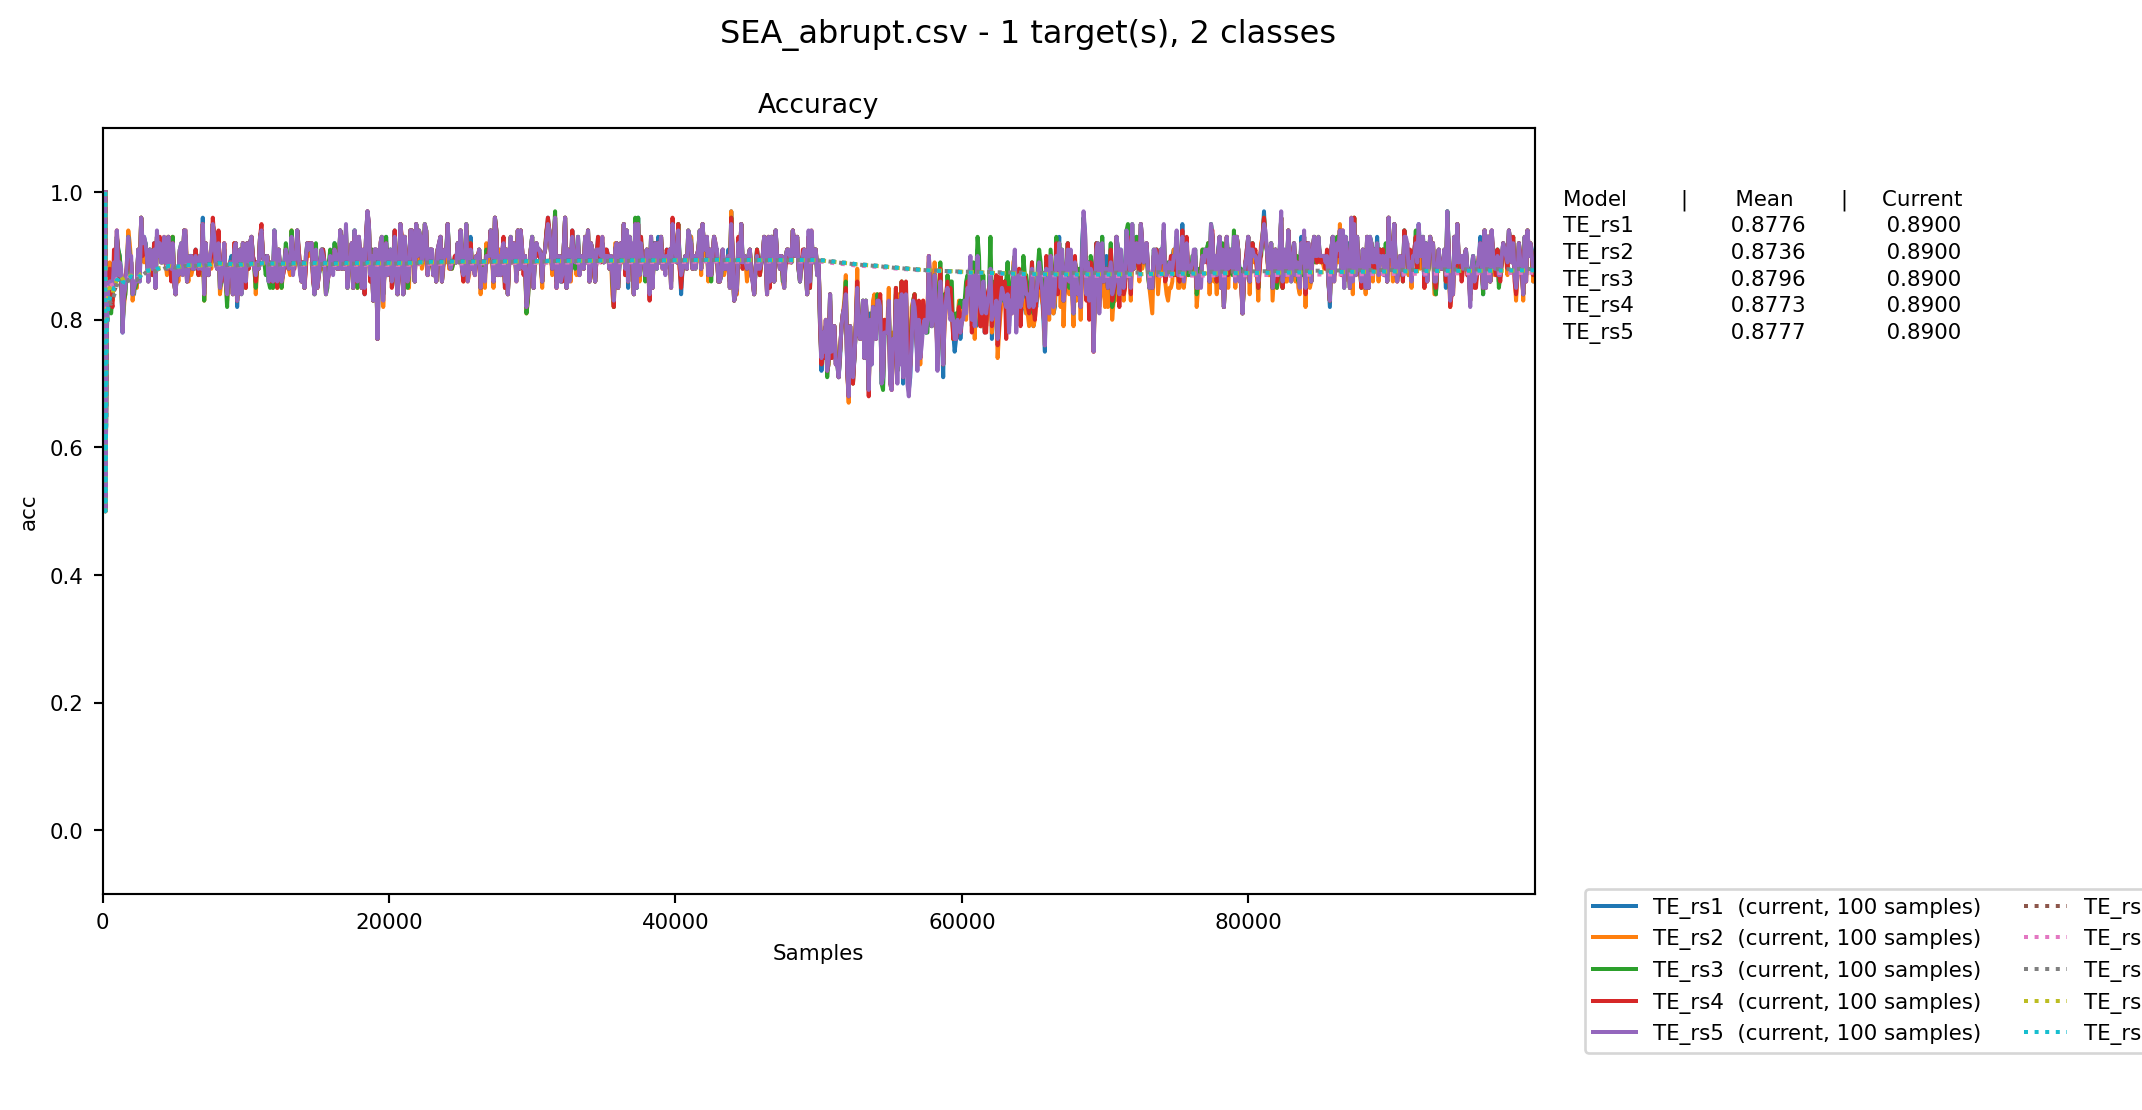

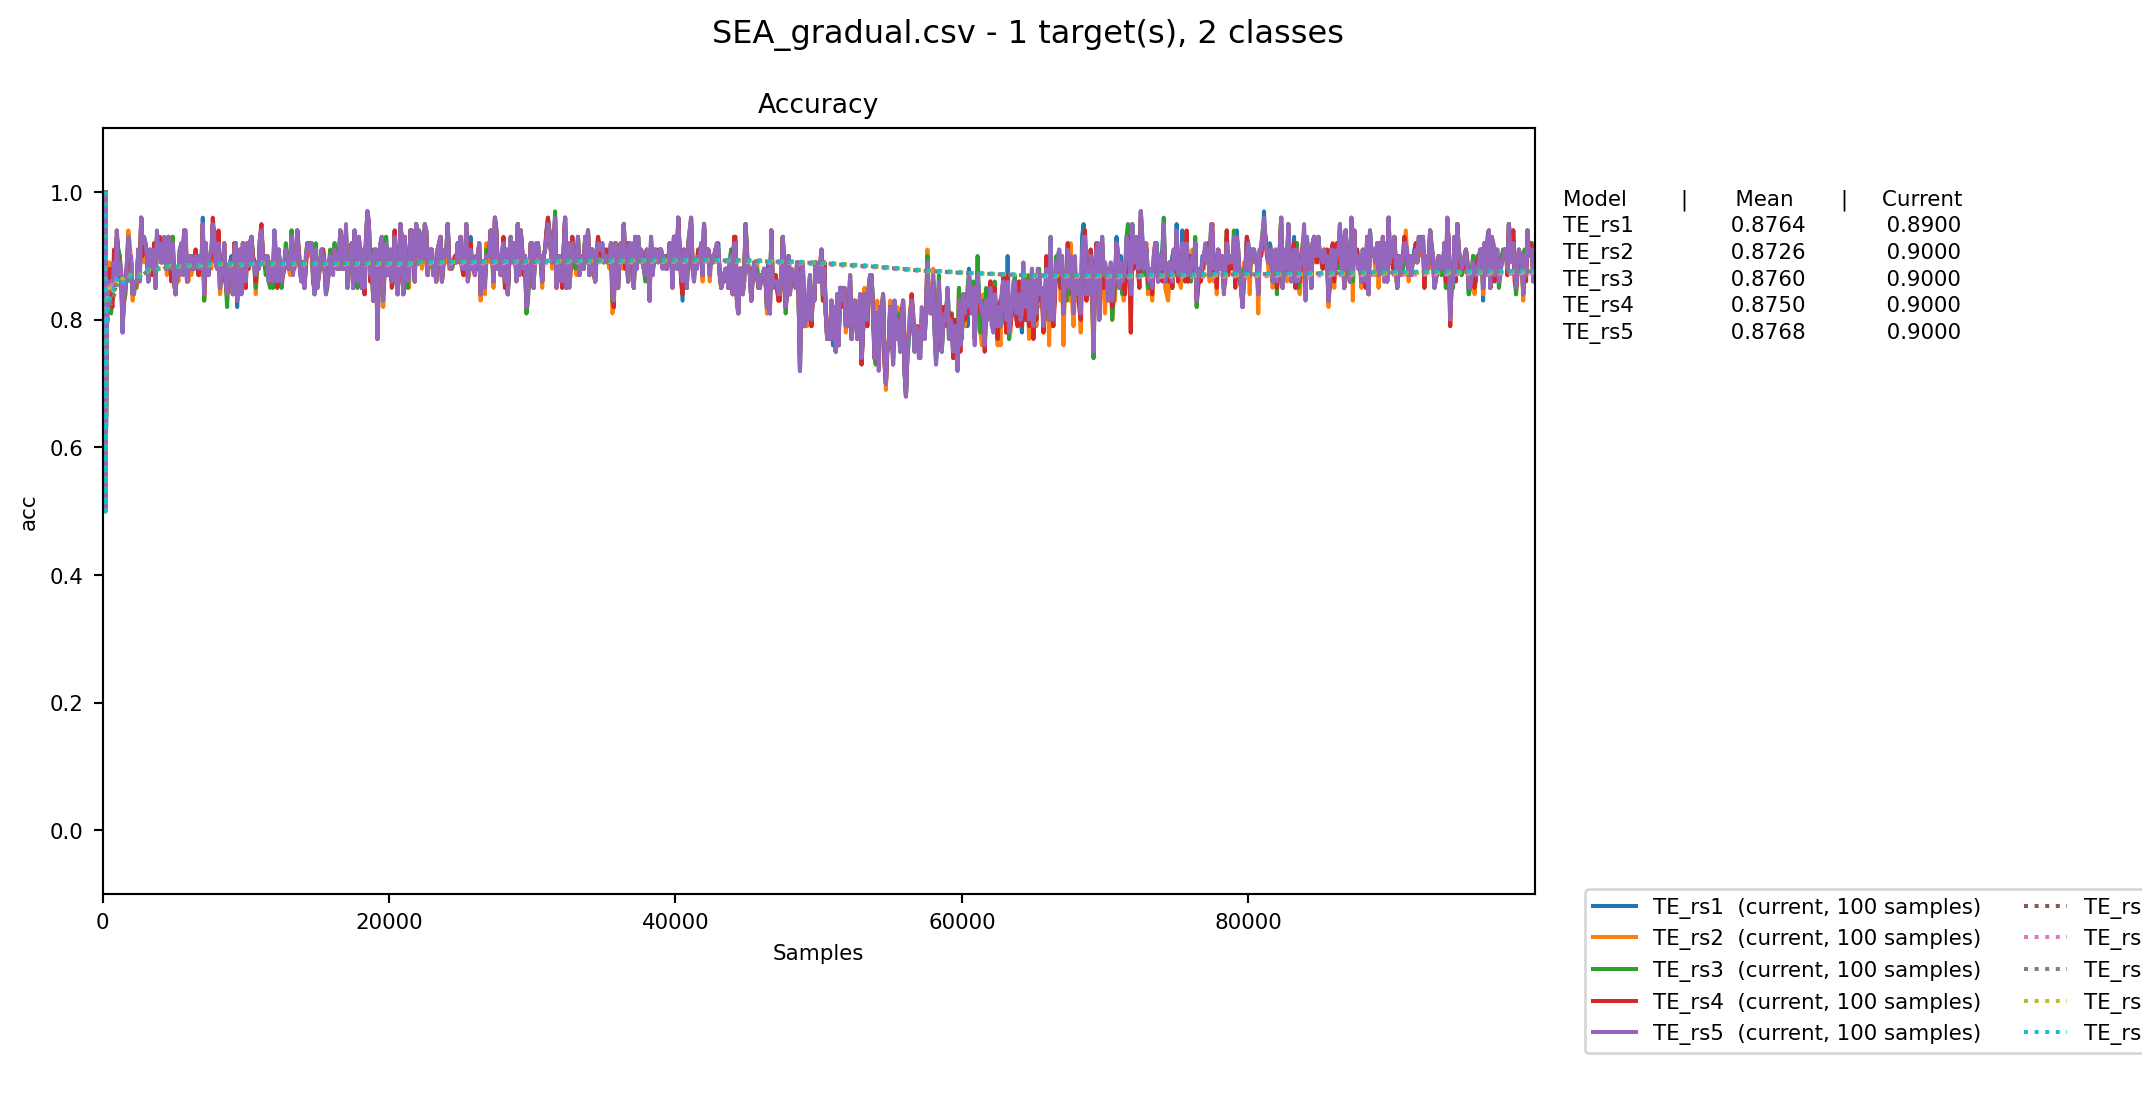

In [61]:
assignment2_datasets = [
    'covtype',
    'electricity',
    'RTG_2abrupt',
    'SEA_abrupt',
    'SEA_gradual',
]

table = [['Dataset', *[l.get_label().split()[0] for l in lines[:5]]]]
for dataset in assignment2_datasets:
    fig = load_figure(f'results/outputs.experiment1-bs1/exp1-2-{dataset}.png.pickle')
    lines = fig.lines
    std_deviations = [np.std(l.get_ydata()) for l in lines[:5]]
    means = [np.average(l.get_ydata()) for l in lines[:5]]
    table.append([dataset, *[f'{mean:.3f}(PMMAGIC{std:.3f})' for mean, std in zip(means, std_deviations)]])

print(pd.DataFrame(table).to_latex(index=None).replace('PMMAGIC', r'$\pm$'))